# Diamonds Price Prediction - Non Linear Models - Ordinal

#### In this notebook we will follow with the implemenation of linear models in the diamonds dataset

In [1]:
#import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Training Data

In [2]:
traindf = pd.read_csv("OUTPUT/cleaned_train.csv")
print(traindf.shape)
traindf.head()

(40339, 9)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
0,0,1.21,Ideal,H,VS2,63.0,57.0,6134,190.734930
1,1,0.28,Very Good,D,VVS2,64.0,56.0,532,45.921708
2,2,0.42,Premium,F,VS1,61.2,58.0,1103,69.338592
3,3,0.26,Ideal,H,IF,61.1,57.0,600,43.362176
4,4,1.10,Good,G,SI1,63.4,57.0,4997,176.802840


#### To implement non linear models in our data we need int instead of categories

## Ordinal Version

In [3]:
train_ord = traindf.iloc[:,1:]

In [4]:
cut_dict = {
    "Fair":1, 
    "Good":2, 
    "Very Good":3, 
    "Premium":4, 
    "Ideal":5
}

color_dict = {
    "J":1,
    "I":2,
    "H":3, 
    "G":4, 
    "F":5, 
    "E":6, 
    "D":7
}

clarity_dict = {
    "I1":1, 
    "SI2":2, 
    "SI1":3, 
    "VS2":4, 
    "VS1":5,
    "VVS2":6,
    "VVS1":7,
    "IF":8
}

train_ord.cut = train_ord.cut.map(cut_dict)
train_ord.color = train_ord.color.map(color_dict)
train_ord.clarity = train_ord.clarity.map(clarity_dict)

In [5]:
train_ord.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,5,3,4,63.0,57.0,6134,190.734930
1,0.28,3,7,6,64.0,56.0,532,45.921708
2,0.42,4,5,5,61.2,58.0,1103,69.338592
3,0.26,5,3,8,61.1,57.0,600,43.362176
4,1.10,2,4,3,63.4,57.0,4997,176.802840


#### But before implementing the non linear models, we have to check 3 steps:
    - Correlation between variables
    - How each independent variable explain price
    - If we need to scale our data

Text(0.5, 1.0, 'Correlation matrix')

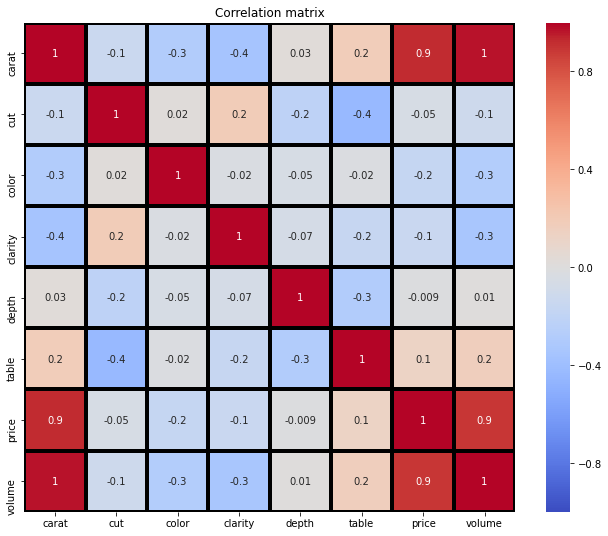

In [6]:
plt.figure(figsize=(11,9))

sns.heatmap(train_ord.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

#### As we have seen in the descriptive analysis, the price is highly correlated with carat and volume and also these to independet variables too. The good news is that most of the non linear models take care of this problem. So lets scale our data and train the different models to test

In [7]:
X_t = train_ord.drop(columns={"price"})
y_t = train_ord.price

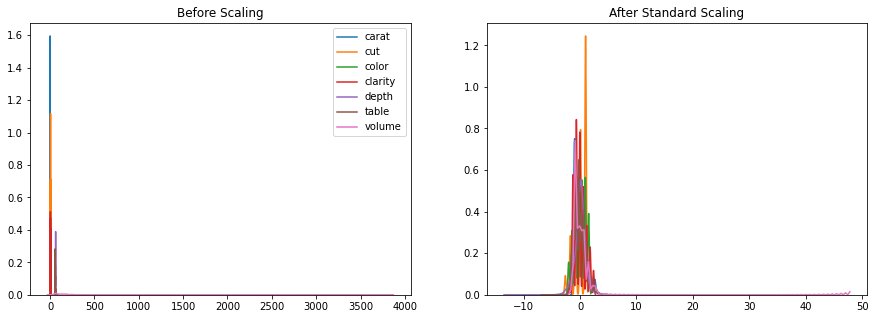

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Xss = sc_X.fit_transform(X_t)

train_SS = pd.DataFrame(Xss, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'volume'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Standard Scaling')
for e in train_SS.columns:
    sns.kdeplot(train_SS[e], ax=ax2, legend=None)
plt.show()

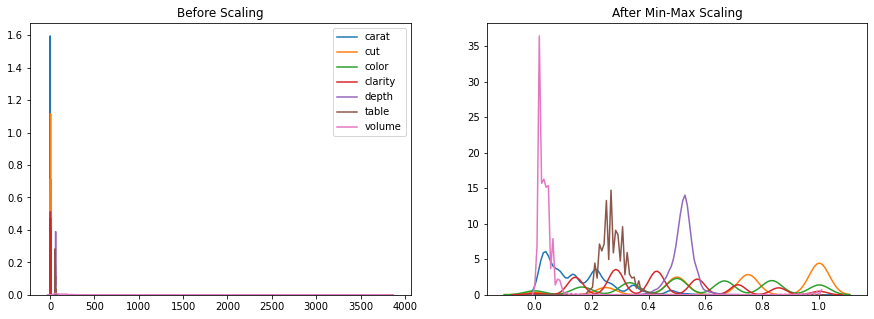

In [9]:
from sklearn.preprocessing import MinMaxScaler
mmc_X = MinMaxScaler()

Xmm = mmc_X.fit_transform(X_t)

train_MM = pd.DataFrame(Xmm, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'volume'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Min-Max Scaling')
for e in train_MM.columns:
    sns.kdeplot(train_MM[e], ax=ax2, legend=None)
plt.show()

#### After processing the data, the standard scaler looks better to train our models

In [10]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

X = train_SS
y = np.ravel(y_t) #we use np.ravel to change shape (x,1) to (x,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32271, 7) (8068, 7) (32271,) (8068,)


In [81]:
#1st select the splited X and y. Then after your model achieves the accuracy needed, train with 100% X and y
#However if you thing you could be overfitting your data you can use the splited model to test
# X, y ----- X_train, y_train
X_training = X
y_training = y

### SVR Regression

In [82]:
from sklearn.svm import SVR

svrReg = SVR(C=1000)

svrReg.fit(X_training, y_training) 
  
svr_pred = svrReg.predict(X_test)

In [83]:
svr_r2 = svrReg.score(X_test, y_test)

svr_rmse = mean_squared_error(y_test, svr_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",svr_r2,"rmse:",svr_rmse)

r2: 0.9755805990901979 rmse: 625.1676136650469


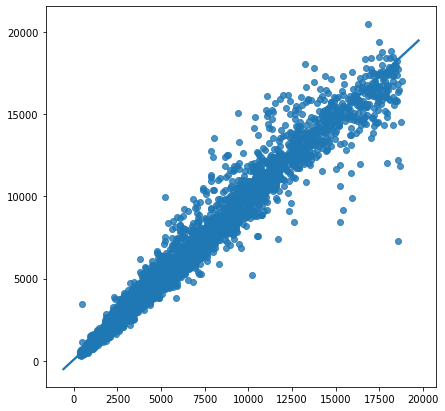

In [84]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, svr_pred, fit_reg=True)

### NuSVR Regression 

In [85]:
from sklearn.svm import NuSVR

nureg = NuSVR(C=1000)

nureg.fit(X_training, y_training) 

nureg_pred = nureg.predict(X_test)

In [86]:
nu_r2 = nureg.score(X_test, y_test)

nureg_rmse = mean_squared_error(y_test, nureg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",nu_r2,"rmse:",nureg_rmse)

r2: 0.9756308888049551 rmse: 624.523541672292


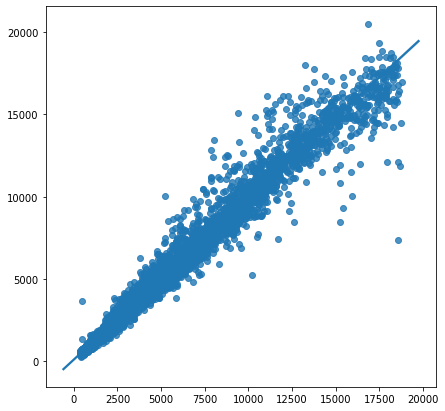

In [87]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, nureg_pred, fit_reg=True)

### KNeighbors Regression

In [88]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors=15, weights="distance", p=1, algorithm="auto")

knnreg.fit(X_training, y_training) 

knnreg_pred = knnreg.predict(X_test)

In [89]:
knn_r2 = knnreg.score(X_test, y_test)

knnreg_rmse = mean_squared_error(y_test, knnreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",knn_r2,"rmse:",knnreg_rmse)

r2: 0.9999351040567491 rmse: 32.22832568059869


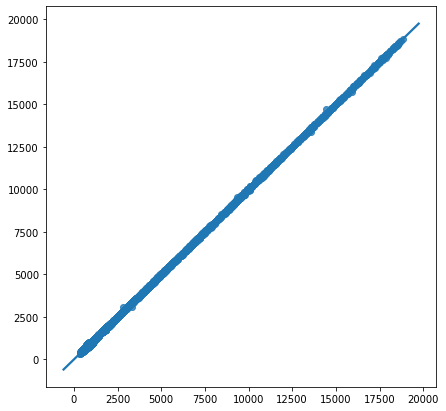

In [90]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, knnreg_pred, fit_reg=True)

### Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

dtreereg = DecisionTreeRegressor(min_samples_split=40, max_features="auto")

dtreereg.fit(X_training, y_training) 

dtreereg_pred = dtreereg.predict(X_test)

In [92]:
dtree_r2 = dtreereg.score(X_test, y_test)

dtree_rmse = mean_squared_error(y_test, dtreereg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",dtree_r2,"rmse:",dtree_rmse)

r2: 0.985850957820293 rmse: 475.8745616221441


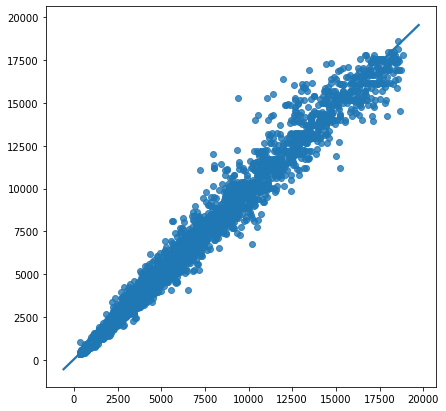

In [93]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, dtreereg_pred, fit_reg=True)

### Bagging Regressor

In [94]:
from sklearn.ensemble import BaggingRegressor

bggreg = BaggingRegressor(n_estimators=500, max_samples=30000, max_features=7, bootstrap=True, bootstrap_features=False)

bggreg.fit(X_training, y_training) 

bggreg_pred = bggreg.predict(X_test)

In [95]:
bgg_r2 = bggreg.score(X_test, y_test)

bgg_rmse = mean_squared_error(y_test, bggreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",bgg_r2,"rmse:",bgg_rmse)

r2: 0.9957394204815526 rmse: 261.1339311693854


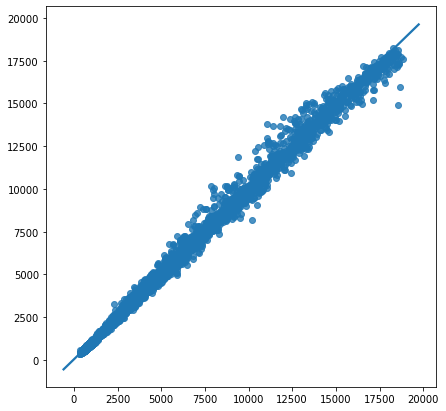

In [96]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, bggreg_pred, fit_reg=True)

### Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=500 ,min_samples_split=10, max_features="auto", min_samples_leaf=1, bootstrap=True)

rfreg.fit(X_training, y_training) 

rfreg_pred = rfreg.predict(X_test)

In [98]:
rf_r2 = rfreg.score(X_test, y_test)

rf_rmse = mean_squared_error(y_test, rfreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",rf_r2,"rmse:",rf_rmse)

r2: 0.9928093130819324 rmse: 339.2455496454314


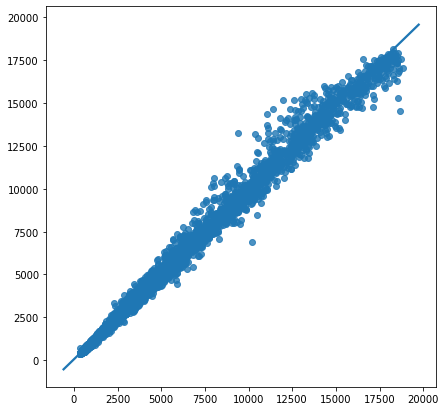

In [99]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, rfreg_pred, fit_reg=True)

### Extra Trees Regressor

In [100]:
from sklearn.ensemble import ExtraTreesRegressor

etreg = ExtraTreesRegressor(n_estimators=500 ,min_samples_split=10, max_features="auto", min_samples_leaf=1, bootstrap=True)

etreg.fit(X_training, y_training) 

etreg_pred = etreg.predict(X_test)

In [101]:
et_r2 = etreg.score(X_test, y_test)

et_rmse = mean_squared_error(y_test, etreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",et_r2,"rmse:",et_rmse)

r2: 0.98953653816535 rmse: 409.2292487669278


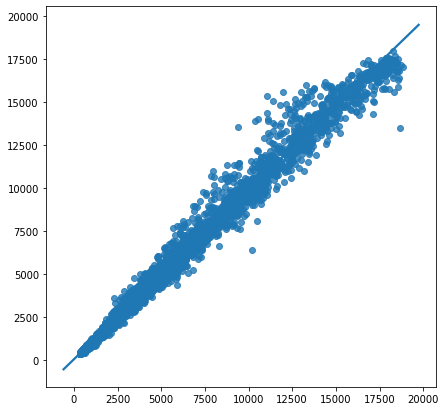

In [102]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, etreg_pred, fit_reg=True)

### Ada Boost Regressor

In [103]:
from sklearn.ensemble import AdaBoostRegressor

abreg = AdaBoostRegressor(base_estimator=None, n_estimators=10, learning_rate=.1, loss="linear")

abreg.fit(X_training, y_training) 

abreg_pred = abreg.predict(X_test)

In [104]:
ab_r2 = abreg.score(X_test, y_test)

ab_rmse = mean_squared_error(y_test, abreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",ab_r2,"rmse:",ab_rmse)

r2: 0.8943210124562091 rmse: 1300.538733156276


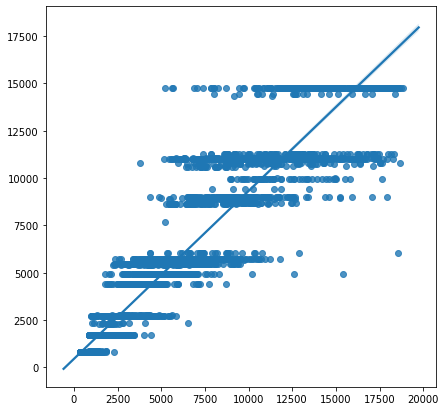

In [105]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, abreg_pred, fit_reg=True)

### Gradient Boosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(n_estimators=1000, subsample=1, min_samples_split=5, max_features="auto", min_samples_leaf=1, alpha=0.5)

gbreg.fit(X_training, y_training) 

gbreg_pred = gbreg.predict(X_test)

In [107]:
gb_r2 = gbreg.score(X_test, y_test)

gb_rmse = mean_squared_error(y_test, gbreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",gb_r2,"rmse:",gb_rmse)

r2: 0.9868697080967733 rmse: 458.4227474546516


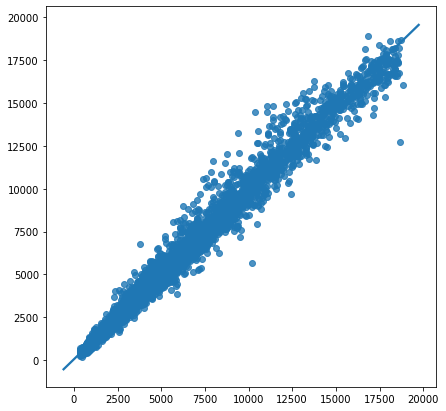

In [108]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, gbreg_pred, fit_reg=True)

### Hist Gradient Boosting Regressor

In [109]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgbreg = HistGradientBoostingRegressor(max_iter=500, max_leaf_nodes=30, min_samples_leaf=2)

hgbreg.fit(X_training, y_training) 

hbreg_pred = hgbreg.predict(X_test)

In [110]:
hgb_r2 = hgbreg.score(X_test, y_test)

hgb_rmse = mean_squared_error(y_test, hbreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",hgb_r2,"rmse:",hgb_rmse)

r2: 0.9916069292713154 rmse: 366.5130229282887


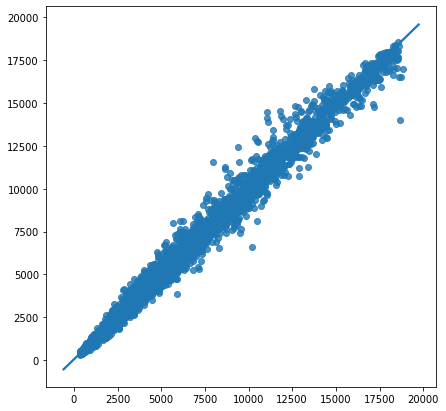

In [111]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, hbreg_pred, fit_reg=True)

### MLP Regressor - Neural Network

In [112]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes=(300, ), activation='relu', solver='adam', alpha=1000, batch_size='auto', max_iter=30000, shuffle=False, random_state=None)

mlpreg.fit(X_training, y_training) 

mlp_pred = mlpreg.predict(X_test)

In [113]:
mlp_r2 = mlpreg.score(X_test, y_test)

mlp_rmse = mean_squared_error(y_test, mlp_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",mlp_r2,"rmse:",mlp_rmse)

r2: 0.9763338675608856 rmse: 615.4497709570823


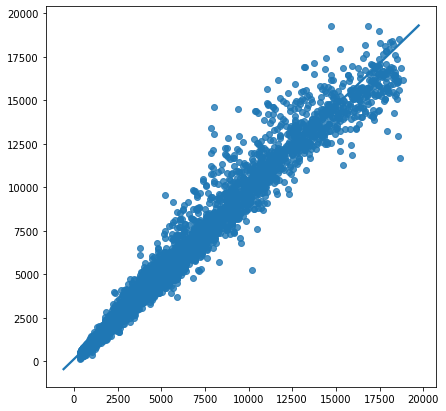

In [114]:
plt.figure(figsize=(7,7))     
sns.regplot(y_test, mlp_pred, fit_reg=True)

#### As we could imagine by checking the pairplot of the descriptive analysis notebook, our predictions perform better with non linear models. Our dataset has hierarchy in all its ordinal variables, so it makes  the relation of each one of these vars with price non linear

In [115]:
testdf = pd.read_csv("INPUT/diamonds_test.csv")
print(testdf.shape)
testdf.head()

(13449, 10)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


#### Compute Volume

In [116]:
testdf["volume"] = testdf.x * testdf.y * testdf.z
index = testdf["Unnamed: 0"]
testdf.drop(columns={"Unnamed: 0","x","y","z"}, inplace=True)

In [117]:
test_ord = testdf

cut_dict = {
    "Fair":1, 
    "Good":2, 
    "Very Good":3, 
    "Premium":4, 
    "Ideal":5
}

color_dict = {
    "J":1,
    "I":2,
    "H":3, 
    "G":4, 
    "F":5, 
    "E":6, 
    "D":7
}

clarity_dict = {
    "I1":1, 
    "SI2":2, 
    "SI1":3, 
    "VS2":4, 
    "VS1":5,
    "VVS2":6,
    "VVS1":7,
    "IF":8
}

test_ord.cut = test_ord.cut.map(cut_dict)
test_ord.color = test_ord.color.map(color_dict)
test_ord.clarity = test_ord.clarity.map(clarity_dict)

In [118]:
test_ord.head()

,carat,cut,color,clarity,depth,table,volume
0,0.30,5,3,2,60.0,56.0,51.771195
1,0.34,5,7,8,62.1,57.0,56.244168
2,1.57,3,2,4,60.3,58.0,260.964240
3,0.31,5,3,4,61.8,57.0,50.478336
4,1.51,2,2,7,64.0,60.0,242.355498


In [119]:
Xss_test = sc_X.fit_transform(test_ord)

test_SS = pd.DataFrame(Xss_test, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'volume'])

#### Now we train our models again but with 100% of the data and take the 3 best

#### Surprisingly, after applying the 100%, the KNN Trees model has the best rmse by far out of all the models

### KNeighbors Regression

In [120]:
knn_test_pred = knnreg.predict(test_SS)

In [121]:
test_knn = pd.DataFrame(knn_test_pred, columns={"price"})
test_knn["id"] = index
test_knn = test_knn[["id","price"]]

In [122]:
test_knn.to_csv("OUTPUT/knn_ord.csv", index=False)

### Bagging Regressor

In [123]:
bgg_test_pred = bggreg.predict(test_SS)

In [124]:
test_bgg = pd.DataFrame(bgg_test_pred, columns={"price"})
test_bgg["id"] = index
test_bgg = test_bgg[["id","price"]]

In [125]:
test_bgg.to_csv("OUTPUT/bagging_ord.csv", index=False)

### Extra Trees Regressor

In [126]:
et_test_pred = etreg.predict(test_SS)

In [127]:
test_et = pd.DataFrame(et_test_pred, columns={"price"})
test_et["id"] = index
test_et = test_et[["id","price"]]

In [128]:
test_et.to_csv("OUTPUT/extra_trees_ord.csv", index=False)

### Hist Gradient Boosting Regressor

In [129]:
hgb_test_pred = hgbreg.predict(test_SS)

In [130]:
test_hgb = pd.DataFrame(hgb_test_pred, columns={"price"})
test_hgb["id"] = index
test_hgb = test_hgb[["id","price"]]

In [131]:
test_hgb.to_csv("OUTPUT/hist_gradient_boosting_ord.csv", index=False)

### Random Forest Regressor

In [132]:
rf_test_pred = rfreg.predict(test_SS)

In [133]:
test_rf = pd.DataFrame(rf_test_pred, columns={"price"})
test_rf["id"] = index
test_rf = test_rf[["id","price"]]

In [134]:
test_rf.to_csv("OUTPUT/random_forest_ord.csv", index=False)

#### As conclusions:
    - The KNN model must be overfitted as the difference between the test rmse and the rmse with new data is huge
    - The ordinal encoder, although the columns; color, cut and clarity are ordinal by nature, the results with the dummy encoder have been better
    - The best option is opt is the Extra Trees Model too